# Water Quality Prediction

#### Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

#### Content
The <b>water_potability.csv</b> file contains water quality metrics for 3276 different water bodies.

1. <b>pH value:</b><br>
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. <b>Hardness:</b><br>
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. <b>Solids (Total dissolved solids - TDS):</b><br>
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. <b>Chloramines:</b><br>
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. <b>Sulfate:</b><br>
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. <b>Conductivity:</b><br>
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. <b>Organic_carbon:</b><br>
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. <b>Trihalomethanes:</b><br>
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. <b>Turbidity:</b><br>
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. <b>Potability:</b><br>
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

<br>
https://www.kaggle.com/adityakadiwal/water-potability

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

## Load the dataset and validate the data load

In [2]:
waterpotability = pd.read_csv("resources/water_potability.csv")

# Check the data load
waterpotability.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# Check the data structure
waterpotability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# Check for missing value
waterpotability.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

There are missing values in ph, sulfate and Trihalomethanes

## Exploratory Data Analysis

0    1998
1    1278
Name: Potability, dtype: int64

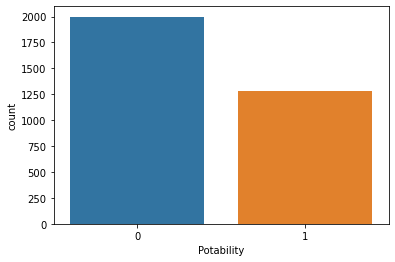

In [5]:
# Explore the target variable
sns.countplot(waterpotability['Potability'])
waterpotability['Potability'].value_counts()

<AxesSubplot:>

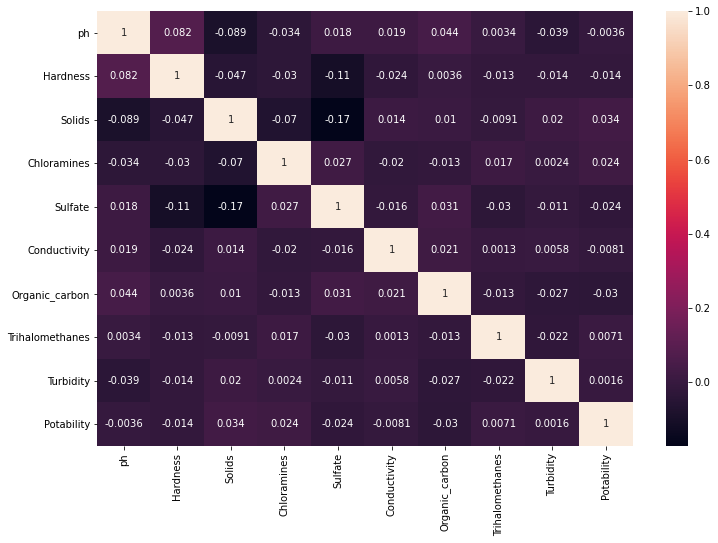

In [6]:
# We will revist the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(waterpotability.corr(), annot=True)

The correlation between the attributes are fairly low and this suggests the attributes are independent

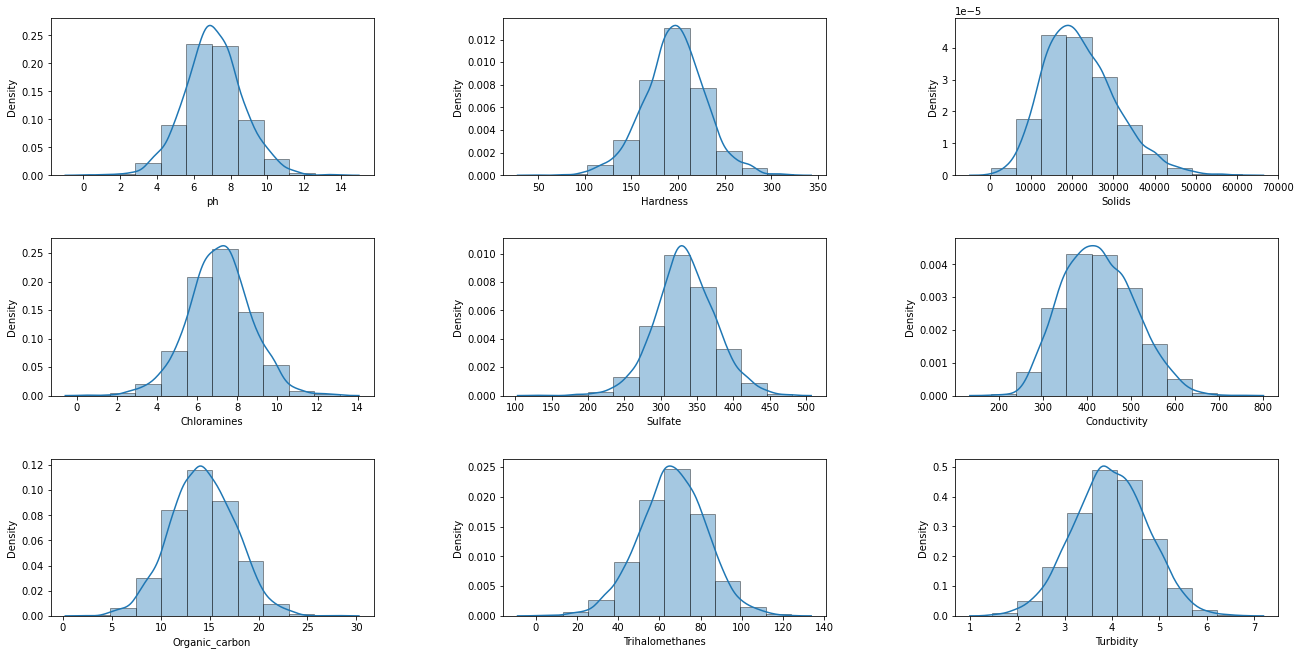

In [7]:
# Let us check the distribution of the attributes

fig = plt.figure(figsize=(22, 11))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 3, 1)
sns.distplot(waterpotability['ph'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 2)
sns.distplot(waterpotability['Hardness'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 3)
sns.distplot(waterpotability['Solids'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 4)
sns.distplot(waterpotability['Chloramines'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 5)
sns.distplot(waterpotability['Sulfate'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 6)
sns.distplot(waterpotability['Conductivity'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 7)
sns.distplot(waterpotability['Organic_carbon'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 8)
sns.distplot(waterpotability['Trihalomethanes'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 9)
sns.distplot(waterpotability['Turbidity'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
plt.show()

All the distributions are fairly normal and distributed around the mean

In [8]:
# View the mean by the response variable

waterpotability.groupby('Potability').mean()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,334.56429,426.730454,14.364335,66.303555,3.965800
1,7.073783,195.800744,22383.991018,7.169338,332.56699,425.383800,14.160893,66.539684,3.968328


In [9]:
# View the stdDev by the response variable
waterpotability.groupby('Potability').std()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282
1,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842


The mean and standard deviations are also fairly close to each other against the response variable

## Treat Missing values

The approach is to substitue mean of the bmi by the target variable - Potability

In [10]:
waterpotability['ph'] = waterpotability['ph'].fillna(waterpotability.groupby('Potability')['ph'].transform('mean'))
waterpotability['Sulfate'] = waterpotability['Sulfate'].fillna(waterpotability.groupby('Potability')['Sulfate'].transform('mean'))
waterpotability['Trihalomethanes'] = waterpotability['Trihalomethanes'].fillna(waterpotability.groupby('Potability')['Trihalomethanes'].transform('mean'))
waterpotability.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Train Test Split and Scaling of the data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = waterpotability.drop(labels=['Potability'], axis=1)
target = waterpotability['Potability']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, random_state=101,
                                                                           stratify = target)

In [12]:
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

## Model Building

In [13]:
# Model imports
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

### Model - Gaussian Naive Bayes

In [14]:
gaussianNBClassifier = GaussianNB()
gaussianNBClassifier.fit(features_train, target_train)

GaussianNB()

In [15]:
predictionsGaussianNB = gaussianNBClassifier.predict(features_test)
print("Confusion Matrix - GaussianNB")
print(confusion_matrix(target_test, predictionsGaussianNB))
print("\n")
print("Accuracy Score - GaussianNB")
print(accuracy_score(target_test, predictionsGaussianNB))
print("\n")
print("Classification Report - GaussianNB")
print(classification_report(target_test, predictionsGaussianNB))
print("F1 Score \n")
print(f1_score(target_test, predictionsGaussianNB))

Confusion Matrix - GaussianNB
[[533  67]
 [302  81]]


Accuracy Score - GaussianNB
0.624618514750763


Classification Report - GaussianNB
              precision    recall  f1-score   support

           0       0.64      0.89      0.74       600
           1       0.55      0.21      0.31       383

    accuracy                           0.62       983
   macro avg       0.59      0.55      0.52       983
weighted avg       0.60      0.62      0.57       983

F1 Score 

0.3050847457627119


### Random Forest Classifier

In [16]:
param_grid = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 'criterion':['entropy', 'gini']}
rfcgrid = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, verbose=100, cv=10, n_jobs=-2)
rfcgrid.fit(features_train, target_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             verbose=100)

In [17]:
# Best params of Random Forest
rfcgrid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 300}

In [18]:
rfcpredictions = rfcgrid.predict(features_test)

print("Confusion Matrix - Random Forest Using Entropy Index")
print(confusion_matrix(target_test,rfcpredictions))
print("\n")
print("Accuracy Score - Random Forest")
print(accuracy_score(target_test, rfcpredictions))
print("\n")
print("Classification Report - Random Forest")
print(classification_report(target_test,rfcpredictions))
print("\n")
print("F1 Score - Random Forest")
print(f1_score(target_test, rfcpredictions))

Confusion Matrix - Random Forest Using Entropy Index
[[533  67]
 [140 243]]


Accuracy Score - Random Forest
0.7894201424211598


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       600
           1       0.78      0.63      0.70       383

    accuracy                           0.79       983
   macro avg       0.79      0.76      0.77       983
weighted avg       0.79      0.79      0.78       983



F1 Score - Random Forest
0.7012987012987013


### XGBoost Classifier

In [19]:
from xgboost import XGBClassifier

param_grid = {'n_estimators':[50, 100, 200, 300], 'max_depth' : [3, 4, 5], 'learning_rate':[0.001, 0.01, 0.1, 1, 10]}
xggrid = GridSearchCV(XGBClassifier(), param_grid, verbose=1, cv=10, n_jobs=10)
xggrid.fit(features_train, target_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[20:46:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [20]:
# Check the best params
xggrid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [21]:
xggrid_predictions = xggrid.predict(features_test)

print("Confusion Matrix")
print(confusion_matrix(target_test, xggrid_predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, xggrid_predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, xggrid_predictions))
print("F1 Score \n")
print(f1_score(target_test, xggrid_predictions))

Confusion Matrix
[[549  51]
 [166 217]]


Accuracy Score
0.7792472024415056


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.92      0.83       600
           1       0.81      0.57      0.67       383

    accuracy                           0.78       983
   macro avg       0.79      0.74      0.75       983
weighted avg       0.78      0.78      0.77       983

F1 Score 

0.6666666666666667
